In [1]:
# Initialize a new VAME project
import functions_bondjango as bd
import functions_vame as fv
import paths
import vame
import random
import os
import shutil

In [2]:
# Manually define the config path if project has already been created
config = r"F:\VAME_projects\VAME_prey_3-Feb28-2021\config.yaml"

In [2]:
# get the file paths

# define the number of files to use
number_files = 0
# define the search string
search_string = 'rig:miniscope'

# define the target model
target_model = 'video_experiment'
# get the queryset
files = bd.query_database(target_model, search_string)

if number_files > 0:
    # pick a random subset of number_files
    files = random.sample(files, number_files)

# get the video paths in a list
video_paths = [el['avi_path'] for el in files]

# define the working directory
working_directory = paths.vame_path

In [3]:
print(files[0]['preproc_files'][0])

dlc_path = files[0]['avi_path']
dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
print(dlc_path)

09_08_2020_15_56_34_miniscope_dg_200617_b_succ_injured_nofluo_preprocessing
J:\Drago Guggiana Nilo\Prey_capture\AnalyzedData\09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo_preproc.hdf5


In [4]:
# initialize the project
config = vame.init_new_project(project='VAME_prey_3', videos=video_paths, working_directory=working_directory, videotype='.avi')

Created "F:\VAME_projects\VAME_prey_3-Feb28-2021\videos"
Created "F:\VAME_projects\VAME_prey_3-Feb28-2021\data"
Created "F:\VAME_projects\VAME_prey_3-Feb28-2021\results"
Created "F:\VAME_projects\VAME_prey_3-Feb28-2021\model"
Copying the videos 

A VAME project has been created. 

Next use vame.create_trainset(config) to split your data into a train and test set. 
Afterwards you can use vame.rnn_model() to train the model on your data.


In [5]:
# Align video trajectories

# get the project folder
project_folder, _ = os.path.split(config)

# for all the videos
for el in files:
    print(f'Current file: {el["slug"]}')
    
    # if there is no preprocessing file, skip and warn
    if len(el['preproc_files']) == 0:
        print('no preprocessing file found')
        continue
    # load the avi file path
    dlc_path = el['avi_path']
    # edit it for the preprocessing path
    dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
    dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
    dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')

    # define the cropping
    crop_size = (1, 1)
    # egocentrically align the data and save
    fv.run_alignment(dlc_path, project_folder, '.avi', crop_size)


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 141/141 [00:00<00:00, 11759.03it/s]

Current file: 09_08_2020_15_56_34_miniscope_dg_200617_b_succ_injured_nofluo
Current file: 09_08_2020_15_54_36_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:00<00:00, 9694.94it/s]


Current file: 09_08_2020_15_50_32_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_47_44_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_43_03_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 9123.13it/s]

Current file: 09_08_2020_15_39_45_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_36_13_miniscope_dg_200617_b_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 8049.28it/s]


Current file: 09_08_2020_15_32_30_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_26_21_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_23_32_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 10364.23it/s]


Current file: 09_08_2020_15_20_34_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_16_25_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_13_51_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [00:00<00:00, 7951.64it/s]


Current file: 09_08_2020_15_10_07_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_06_13_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_03_49_miniscope_dg_200701_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 146/146 [00:00<00:00, 8583.32it/s]


Current file: 09_08_2020_15_00_07_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_41_46_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_38_41_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 147/147 [00:00<00:00, 8643.56it/s]


Current file: 09_07_2020_15_35_51_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_32_36_miniscope_dg_200617_b_succ_injured
Current file: 09_07_2020_15_29_47_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 8448.94it/s]


Current file: 09_07_2020_15_26_46_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_23_07_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_18_17_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 8782.14it/s]


Current file: 09_07_2020_15_02_53_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_59_11_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_57_17_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 8302.91it/s]


Current file: 09_07_2020_14_53_42_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_51_32_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_48_19_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 13198.88it/s]


Current file: 09_07_2020_14_45_29_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_42_14_miniscope_dg_200701_a_succ_injured
Current file: 09_06_2020_15_51_43_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<00:00, 11391.29it/s]


Current file: 09_06_2020_15_47_33_miniscope_dg_200617_b_succ_injured
Current file: 09_06_2020_15_43_13_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_38_32_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 11405.84it/s]


Current file: 09_06_2020_15_35_22_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_31_55_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_28_50_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 8338.29it/s]


Current file: 09_06_2020_15_25_10_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_18_22_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_14_12_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 8688.44it/s]


Current file: 09_06_2020_15_11_37_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_09_11_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_05_22_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 146/146 [00:00<00:00, 12173.35it/s]


Current file: 09_06_2020_15_02_17_miniscope_dg_200701_a_succ
Current file: 09_06_2020_14_58_24_miniscope_dg_200701_a_succ
Current file: 09_06_2020_14_55_10_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 12445.12it/s]


Current file: 09_05_2020_16_30_05_miniscope_dg_200617_b_succ_injured
Current file: 09_05_2020_16_26_47_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_23_03_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 9347.05it/s]


Current file: 09_05_2020_16_19_09_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_16_21_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_12_58_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 7996.41it/s]


Current file: 09_05_2020_16_09_14_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_06_30_miniscope_dg_200617_b_succ
Current file: 09_05_2020_15_59_18_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 11896.68it/s]


Current file: 09_05_2020_15_56_40_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_52_46_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_50_02_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 8662.61it/s]


Current file: 09_05_2020_15_47_48_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_45_35_miniscope_dg_200701_a_succ_injured
Current file: 09_05_2020_15_42_56_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [00:00<00:00, 9005.03it/s]

Current file: 09_05_2020_15_40_48_miniscope_dg_200701_a_succ_injured
Current file: 09_04_2020_17_26_53_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_23_03_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 10757.19it/s]


Current file: 09_04_2020_17_17_48_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_14_08_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_11_33_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 232/232 [00:00<00:00, 8285.75it/s]


Current file: 09_04_2020_17_07_37_miniscope_dg_200617_b_succ_injured
Current file: 09_04_2020_17_03_57_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_00_52_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 142/142 [00:00<00:00, 8349.33it/s]


Current file: 09_04_2020_16_52_56_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_49_06_miniscope_dg_200701_a_succ_injured
Current file: 09_04_2020_16_46_11_miniscope_dg_200701_a_succ_distractedbytrash


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 9968.00it/s]


Current file: 09_04_2020_16_43_01_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_39_31_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_35_52_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 9227.55it/s]


Current file: 09_04_2020_16_33_29_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_30_05_miniscope_dg_200701_a_succ_injured
Current file: 09_03_2020_16_47_03_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 276/276 [00:00<00:00, 12006.22it/s]


Current file: 09_03_2020_16_43_43_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_40_53_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_36_15_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 8040.48it/s]


Current file: 09_03_2020_16_31_10_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_28_25_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_24_34_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 9904.23it/s]


Current file: 09_03_2020_16_21_39_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_15_16_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_12_49_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191/191 [00:00<00:00, 11956.36it/s]


Current file: 09_03_2020_16_09_44_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_06_54_miniscope_dg_200701_a_succ_injured
Current file: 09_03_2020_16_03_07_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 8487.63it/s]

Current file: 09_03_2020_15_59_43_miniscope_dg_200701_a_succ
Current file: 09_03_2020_15_57_43_miniscope_dg_200701_a_succ
Current file: 09_03_2020_15_54_14_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 13463.82it/s]


Current file: 09_02_2020_17_38_56_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_35_23_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_32_19_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 11878.48it/s]


Current file: 09_02_2020_17_27_37_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_24_54_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_21_30_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 12455.95it/s]


Current file: 09_02_2020_17_17_37_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_13_08_miniscope_dg_200617_b_succ
Current file: 09_02_2020_16_55_43_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 8773.09it/s]


Current file: 09_02_2020_16_53_10_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_50_16_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_45_55_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 12256.92it/s]

Current file: 09_02_2020_16_41_25_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_37_35_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 12659.94it/s]


Current file: 09_02_2020_16_34_36_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_30_27_miniscope_dg_200701_a_succ_injured
Current file: 09_01_2020_16_58_35_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 8285.81it/s]


Current file: 09_01_2020_16_55_25_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_52_15_miniscope_dg_200617_b_succ_injured
Current file: 09_01_2020_16_47_10_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:00<00:00, 8725.35it/s]


Current file: 09_01_2020_16_43_46_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_39_52_miniscope_dg_200617_b_succ_injured
Current file: 09_01_2020_16_34_42_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 12006.45it/s]


Current file: 09_01_2020_16_29_24_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_20_52_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_17_14_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 11920.91it/s]


Current file: 09_01_2020_16_14_05_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_10_27_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_07_13_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:00<00:00, 8225.83it/s]


Current file: 09_01_2020_16_03_24_miniscope_dg_200701_a_succ
Current file: 09_01_2020_15_59_31_miniscope_dg_200701_a_succ
Current file: 09_01_2020_15_56_27_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<00:00, 11208.98it/s]

Current file: 08_31_2020_16_42_25_miniscope_dg_200617_b_succ_injured
Current file: 08_31_2020_16_39_00_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_36_15_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 222/222 [00:00<00:00, 11691.81it/s]


Current file: 08_31_2020_16_32_34_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_29_59_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_26_28_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/259 [00:00<?, ?it/s]

Current file: 08_31_2020_16_22_19_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_17_53_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 10478.84it/s]


Current file: 08_31_2020_16_10_12_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_05_52_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_01_53_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 8281.60it/s]


Current file: 08_31_2020_15_59_34_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_54_51_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_50_06_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 325/325 [00:00<00:00, 9860.81it/s]


Current file: 08_31_2020_15_46_43_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_41_54_miniscope_dg_200701_a_succ
Current file: 08_30_2020_16_35_54_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 259/259 [00:00<00:00, 10358.18it/s]


Current file: 08_30_2020_16_31_45_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_28_07_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_24_08_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 8437.42it/s]

Current file: 08_30_2020_16_20_40_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_17_16_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 8327.80it/s]

Current file: 08_30_2020_16_14_23_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_10_58_miniscope_dg_200617_b_succ_injured
Current file: 08_30_2020_16_03_21_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 376/376 [00:00<00:00, 11400.37it/s]

Current file: 08_30_2020_15_59_37_miniscope_dg_200701_a_succ_injured
Current file: 08_30_2020_15_56_29_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<00:00, 8813.76it/s]


Current file: 08_30_2020_15_53_35_miniscope_dg_200701_a_succ_injured
Current file: 08_30_2020_15_50_51_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_47_33_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [00:00<00:00, 12513.48it/s]


Current file: 08_30_2020_15_44_44_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_40_53_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_54_07_miniscope_dg_200617_b_succ_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 12230.72it/s]


Current file: 08_29_2020_16_50_48_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_46_00_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_42_06_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 353/353 [00:00<00:00, 8210.49it/s]

Current file: 08_29_2020_16_38_23_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_33_45_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 8280.23it/s]

Current file: 08_29_2020_16_31_16_miniscope_dg_200617_b_succ_injured
Current file: 08_29_2020_16_26_47_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_17_59_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 276/276 [00:00<00:00, 8907.71it/s]


Current file: 08_29_2020_16_15_31_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_12_42_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_08_29_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 8922.99it/s]

Current file: 08_29_2020_16_04_30_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_01_17_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 9338.73it/s]

Current file: 08_29_2020_15_58_33_miniscope_dg_200701_a_succ
Current file: 08_29_2020_15_55_24_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/331 [00:00<?, ?it/s]

Current file: 08_21_2020_16_33_02_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_28_13_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/394 [00:00<?, ?it/s]

Current file: 08_21_2020_16_24_35_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_18_56_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 12006.88it/s]

Current file: 08_21_2020_16_12_47_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_08_48_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_03_54_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:00<00:00, 9130.25it/s]


Current file: 08_21_2020_15_58_04_miniscope_dg_200617_b_succ_injured
Current file: 08_21_2020_15_48_23_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 12005.39it/s]

Current file: 08_21_2020_15_45_14_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_42_56_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_39_23_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 12511.35it/s]


Current file: 08_21_2020_15_36_39_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_34_25_miniscope_dg_200701_a_succ_injured
Current file: 08_21_2020_15_32_26_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/342 [00:00<?, ?it/s]

Current file: 08_21_2020_15_29_32_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_43_39_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 12278.54it/s]


Current file: 08_20_2020_16_40_35_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_36_12_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_31_59_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 11069.90it/s]


Current file: 08_20_2020_16_27_00_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_23_32_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_18_53_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 293/293 [00:00<00:00, 11274.70it/s]


Current file: 08_20_2020_16_13_59_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_06_26_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_03_02_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/325 [00:00<?, ?it/s]

Current file: 08_20_2020_15_57_27_miniscope_dg_200701_a_succ_grabbedcable
Current file: 08_20_2020_15_54_48_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 334/334 [00:00<00:00, 10443.47it/s]

Current file: 08_20_2020_15_51_33_miniscope_dg_200701_a_succ
Current file: 08_20_2020_15_48_39_miniscope_dg_200701_a_succ
Current file: 08_20_2020_15_43_36_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 11339.74it/s]

Current file: 08_20_2020_15_40_41_miniscope_dg_200701_a_succ
Current file: 08_19_2020_16_55_33_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/311 [00:00<?, ?it/s]

Current file: 08_19_2020_16_52_39_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_50_11_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/408 [00:00<?, ?it/s]

Current file: 08_19_2020_16_44_52_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_39_04_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 341/341 [00:00<00:00, 8322.47it/s]

Current file: 08_19_2020_16_35_29_miniscope_dg_200617_b_succ_injured
Current file: 08_19_2020_16_33_11_miniscope_dg_200617_b_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 455/455 [00:00<00:00, 13007.32it/s]


Current file: 08_19_2020_16_27_02_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_16_55_miniscope_dg_200701_a_succ_noncon


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 277/277 [00:00<00:00, 10659.90it/s]

Current file: 08_19_2020_16_11_32_miniscope_dg_200701_a_succ_injured
Current file: 08_19_2020_16_09_08_miniscope_dg_200701_a_succ
Current file: 08_19_2020_16_05_59_miniscope_dg_200701_a_succ_grabbedcable



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 284/284 [00:00<00:00, 12364.36it/s]

Current file: 08_19_2020_16_01_41_miniscope_dg_200701_a_succ
Current file: 08_19_2020_15_58_22_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 217/217 [00:00<00:00, 9054.92it/s]

Current file: 08_19_2020_15_55_28_miniscope_dg_200701_a_succ_injured
Current file: 08_19_2020_15_51_39_miniscope_dg_200701_a_succ_injured
Current file: 08_18_2020_16_45_57_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 303/303 [00:00<00:00, 12126.78it/s]

Current file: 08_18_2020_16_41_33_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_38_40_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 439/439 [00:00<00:00, 9147.63it/s]


Current file: 08_18_2020_16_34_54_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_31_06_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/283 [00:00<?, ?it/s]

Current file: 08_18_2020_16_28_42_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_25_33_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 10692.60it/s]

Current file: 08_18_2020_16_23_10_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_15_09_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_11_41_miniscope_dg_200701_a_succ_grabbedcable



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 8713.66it/s]

Current file: 08_18_2020_16_08_29_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_04_51_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_01_32_miniscope_dg_200701_a_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 8359.53it/s]


Current file: 08_18_2020_15_59_09_miniscope_dg_200701_a_succ
Current file: 08_18_2020_15_54_55_miniscope_dg_200701_a_succ
Current file: 08_18_2020_15_51_16_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/399 [00:00<?, ?it/s]

Current file: 08_17_2020_16_25_53_miniscope_dg_200617_b_succ_injured
Current file: 08_17_2020_16_22_44_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 219/219 [00:00<00:00, 8769.92it/s]


Current file: 08_17_2020_16_19_31_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_16_18_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_12_24_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 254/254 [00:00<00:00, 8472.13it/s]


Current file: 08_17_2020_16_10_15_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_06_06_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_01_03_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 8838.47it/s]


Current file: 08_17_2020_15_50_49_miniscope_dg_200701_a_succ_injured
Current file: 08_17_2020_15_47_55_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_45_26_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/404 [00:00<?, ?it/s]

Current file: 08_17_2020_15_43_31_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_40_54_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 232/232 [00:00<00:00, 10541.31it/s]


Current file: 08_17_2020_15_38_44_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_36_48_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_34_07_miniscope_dg_200701_a_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:00<00:00, 8046.65it/s]

Current file: 08_16_2020_16_27_15_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_23_16_miniscope_dg_200617_b_succ_injured
Current file: 08_16_2020_16_18_28_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 12710.30it/s]


Current file: 08_16_2020_16_15_42_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_13_04_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_09_31_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 277/277 [00:00<00:00, 9551.63it/s]

Current file: 08_16_2020_16_07_07_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_04_28_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<00:00, 11628.63it/s]

Current file: 08_16_2020_15_56_30_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_52_46_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_50_17_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 8241.16it/s]

Current file: 08_16_2020_15_46_53_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_43_35_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 8900.22it/s]


Current file: 08_16_2020_15_41_26_miniscope_dg_200701_a_succ_injured
Current file: 08_16_2020_15_39_22_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_35_26_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/348 [00:00<?, ?it/s]

Current file: 08_15_2020_16_36_57_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_34_53_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:00<00:00, 8310.67it/s]

Current file: 08_15_2020_16_31_30_miniscope_dg_200617_b_succ_nofluo
Current file: 08_15_2020_16_28_36_miniscope_dg_200617_b_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 11477.42it/s]

Current file: 08_15_2020_16_25_08_miniscope_dg_200617_b_succ_injured
Current file: 08_15_2020_16_22_29_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_18_50_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226/226 [00:00<00:00, 12572.95it/s]


Current file: 08_15_2020_16_16_11_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_12_31_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_05_59_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 11635.67it/s]


Current file: 08_15_2020_16_02_16_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_58_47_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_54_28_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 254/254 [00:00<00:00, 12091.72it/s]


Current file: 08_15_2020_15_52_25_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_49_06_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_45_13_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 8843.57it/s]

Current file: 08_15_2020_15_41_21_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_57_32_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 312/312 [00:00<00:00, 12479.48it/s]

Current file: 08_14_2020_15_54_58_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_50_50_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/784 [00:00<?, ?it/s]

Current file: 08_14_2020_15_47_26_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_44_42_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<00:00, 11627.90it/s]

Current file: 08_14_2020_15_40_19_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_37_49_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_34_20_miniscope_dg_200617_b_succ_injured



Align frames:   0%|                                                                                                                                                                                                                                | 0/390 [00:00<?, ?it/s]

Current file: 08_14_2020_15_28_27_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_23_43_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 8162.48it/s]


Current file: 08_14_2020_15_21_09_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_17_30_miniscope_dg_200701_a_succ_injured
Current file: 08_14_2020_15_09_52_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 9480.91it/s]


Current file: 08_14_2020_15_07_03_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_04_44_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_02_32_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/272 [00:00<?, ?it/s]

Current file: 08_13_2020_16_35_25_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_32_11_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 259/259 [00:00<00:00, 8632.79it/s]

Current file: 08_13_2020_16_26_36_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_21_12_miniscope_dg_200617_b_succ_injured
Current file: 08_13_2020_16_17_47_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 7930.28it/s]


Current file: 08_13_2020_16_12_01_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 371/371 [00:00<00:00, 12374.64it/s]

Current file: 08_13_2020_16_09_18_miniscope_dg_200617_b_succ_injured
Current file: 08_13_2020_16_05_09_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 12007.52it/s]

Current file: 08_13_2020_15_59_37_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_55_14_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/401 [00:00<?, ?it/s]

Current file: 08_13_2020_15_52_37_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_49_59_miniscope_dg_200701_a_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:00<00:00, 8882.46it/s]


Current file: 08_13_2020_15_45_14_miniscope_dg_200701_a_succ_injured
Current file: 08_13_2020_15_42_16_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_39_43_miniscope_dg_200701_a_succ_movecam


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 9737.64it/s]


Current file: 08_13_2020_15_36_29_miniscope_dg_200701_a_succ
Current file: 08_12_2020_16_30_56_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_24_56_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327/327 [00:00<00:00, 9349.08it/s]


Current file: 08_12_2020_16_21_45_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_17_05_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_14_41_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/378 [00:00<?, ?it/s]

Current file: 08_12_2020_16_12_08_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_06_17_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 8806.39it/s]


Current file: 08_12_2020_16_02_32_miniscope_dg_200617_b_succ
Current file: 08_12_2020_15_56_49_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_51_54_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 310/310 [00:00<00:00, 8857.60it/s]

Current file: 08_12_2020_15_47_44_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_44_23_miniscope_dg_200701_a_succ_noncon
Current file: 08_12_2020_15_39_17_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 843/843 [00:00<00:00, 8786.12it/s]

Current file: 08_12_2020_15_35_36_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 9740.77it/s]


Current file: 08_12_2020_15_32_21_miniscope_dg_200701_a_succ_injured
Current file: 08_12_2020_15_29_25_miniscope_dg_200701_a_succ
Current file: 08_11_2020_16_10_57_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [00:00<00:00, 11006.18it/s]

Current file: 08_11_2020_16_06_06_miniscope_dg_200617_b_succ
Current file: 08_11_2020_16_03_21_miniscope_dg_200617_b_succ
Current file: 08_11_2020_16_00_10_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/417 [00:00<?, ?it/s]

Current file: 08_11_2020_15_56_40_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_51_51_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 8943.50it/s]

Current file: 08_11_2020_15_47_26_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_44_45_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_33_47_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 9378.01it/s]


Current file: 08_11_2020_15_31_17_miniscope_dg_200701_a_succ_injured
Current file: 08_11_2020_15_27_09_miniscope_dg_200701_a_succ_injured
Current file: 08_11_2020_15_25_00_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 316/316 [00:00<00:00, 8778.47it/s]


Current file: 08_11_2020_15_22_04_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_17_38_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_15_22_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 8428.18it/s]


Current file: 08_11_2020_15_12_33_miniscope_dg_200701_a_succ
Current file: 08_10_2020_17_33_00_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_27_54_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 12006.74it/s]


Current file: 08_10_2020_17_24_14_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_20_19_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_16_40_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:00<00:00, 8332.67it/s]

Current file: 08_10_2020_17_13_00_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_07_51_miniscope_dg_200617_b_succ_injured



Align frames:   0%|                                                                                                                                                                                                                                | 0/340 [00:00<?, ?it/s]

Current file: 08_10_2020_17_04_35_miniscope_dg_200617_b_succ
Current file: 08_10_2020_16_56_35_miniscope_dg_200701_a_succ_injured


Align frames:   0%|                                                                                                                                                                                                                                | 0/361 [00:00<?, ?it/s]

Current file: 08_10_2020_16_52_15_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_48_58_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 399/399 [00:00<00:00, 10785.61it/s]

Current file: 08_10_2020_16_44_58_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_41_32_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/304 [00:00<?, ?it/s]

Current file: 08_10_2020_16_38_11_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_34_57_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 8116.38it/s]

Current file: 08_10_2020_16_31_43_miniscope_dg_200701_a_succ
Current file: 08_09_2020_16_26_36_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/582 [00:00<?, ?it/s]

Current file: 08_09_2020_16_23_45_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_17_40_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/582 [00:00<?, ?it/s]

Current file: 08_09_2020_16_13_20_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_08_16_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/377 [00:00<?, ?it/s]

Current file: 08_09_2020_16_03_39_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_01_33_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/325 [00:00<?, ?it/s]

Current file: 08_09_2020_15_57_15_miniscope_dg_200617_b_succ
Current file: 08_09_2020_15_51_40_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/376 [00:00<?, ?it/s]

Current file: 08_09_2020_15_48_25_miniscope_dg_200701_a_succ_nomini
Current file: 08_09_2020_15_44_35_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 376/376 [00:00<00:00, 8745.74it/s]


Current file: 08_09_2020_15_08_18_miniscope_dg_200701_a_fail_alive


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 387/387 [00:00<00:00, 11733.89it/s]


Current file: 08_09_2020_15_05_48_miniscope_dg_200701_a_succ
Current file: 08_09_2020_15_03_09_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 380/380 [00:00<00:00, 9505.28it/s]


Current file: 08_09_2020_14_59_34_miniscope_dg_200701_a_succ_injured
Current file: 08_09_2020_14_55_56_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 369/369 [00:00<00:00, 11902.35it/s]

Current file: 08_09_2020_14_53_16_miniscope_dg_200701_a_succ
Current file: 08_08_2020_16_29_56_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 466/466 [00:00<00:00, 10136.21it/s]


Current file: 08_08_2020_16_26_31_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_18_51_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/455 [00:00<?, ?it/s]

Current file: 08_08_2020_16_15_39_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_12_42_miniscope_dg_200617_b_succ_noncon


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 665/665 [00:00<00:00, 8989.46it/s]

Current file: 08_08_2020_16_08_14_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_00_22_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:00<00:00, 7693.50it/s]

Current file: 08_08_2020_15_57_37_miniscope_dg_200617_b_succ
Current file: 08_08_2020_15_50_40_miniscope_dg_200701_a_succ_noncon
Current file: 08_08_2020_15_47_53_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 12151.76it/s]


Current file: 08_08_2020_15_44_28_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_38_09_miniscope_dg_200701_a_succ_injured


Align frames:   0%|                                                                                                                                                                                                                               | 0/1402 [00:00<?, ?it/s]

Current file: 08_08_2020_15_33_57_miniscope_dg_200701_a_succ_injured_noncon


Align frames:   0%|                                                                                                                                                                                                                                | 0/334 [00:00<?, ?it/s]

Current file: 08_08_2020_15_30_48_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_27_33_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 565/565 [00:00<00:00, 11084.21it/s]


Current file: 08_08_2020_15_24_06_miniscope_dg_200701_a_succ
Current file: 08_07_2020_17_13_15_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 10929.77it/s]


Current file: 08_07_2020_17_08_34_miniscope_dg_200617_b_succ
Current file: 08_07_2020_17_03_26_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 576/576 [00:00<00:00, 10474.58it/s]


Current file: 08_07_2020_16_57_16_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_52_22_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<00:00, 9255.33it/s]


Current file: 08_07_2020_16_48_37_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_43_52_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [00:00<00:00, 8807.74it/s]


Current file: 08_07_2020_16_39_29_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_28_48_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 558/558 [00:00<00:00, 10151.82it/s]


Current file: 08_07_2020_16_24_44_miniscope_dg_200701_a_succ_noncon
Current file: 08_07_2020_16_21_53_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/395 [00:00<?, ?it/s]

Current file: 08_07_2020_16_16_35_miniscope_dg_200701_a_succ
Current file: 08_07_2020_16_13_27_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 570/570 [00:00<00:00, 9502.84it/s]


Current file: 08_07_2020_16_08_55_miniscope_dg_200701_a_succ
Current file: 08_07_2020_16_05_16_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 464/464 [00:00<00:00, 9471.13it/s]


Current file: 08_07_2020_16_01_27_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_53_34_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 410/410 [00:00<00:00, 8368.60it/s]


Current file: 08_06_2020_18_50_24_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_46_29_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 414/414 [00:00<00:00, 8122.22it/s]


Current file: 08_06_2020_18_42_09_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_35_22_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:00<00:00, 9309.56it/s]


Current file: 08_06_2020_18_30_31_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_24_41_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1140 [00:00<?, ?it/s]

Current file: 08_06_2020_18_15_22_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 452/452 [00:00<00:00, 10517.76it/s]


Current file: 08_06_2020_18_07_32_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_02_17_miniscope_dg_200701_a_succ


Align frames:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 913/996 [00:00<00:00, 9044.87it/s]

Current file: 08_06_2020_17_58_44_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 803/803 [00:00<00:00, 11162.09it/s]


Current file: 08_06_2020_17_54_57_miniscope_dg_200701_a_succ
Current file: 08_06_2020_17_47_03_miniscope_dg_200701_a_fail


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 707/707 [00:00<00:00, 11409.71it/s]


Current file: 08_06_2020_17_41_32_miniscope_dg_200701_a_succ
Current file: 08_06_2020_17_37_15_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 672/672 [00:00<00:00, 9086.13it/s]

Current file: 08_06_2020_17_33_37_miniscope_dg_200701_a_succ
Current file: 08_05_2020_16_20_09_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/2417 [00:00<?, ?it/s]

Current file: 08_05_2020_16_11_00_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1363 [00:00<?, ?it/s]

Current file: 08_05_2020_16_06_18_miniscope_dg_200617_b_succ_earlystop


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1363/1363 [00:00<00:00, 9213.59it/s]


Current file: 08_05_2020_15_55_12_miniscope_dg_200617_b_succ


Align frames:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 1019/1225 [00:00<00:00, 10094.99it/s]

Current file: 08_05_2020_15_43_21_miniscope_dg_200701_a_succ


Align frames:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 966/1077 [00:00<00:00, 9569.73it/s]

Current file: 08_05_2020_15_36_29_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1610 [00:00<?, ?it/s]

Current file: 08_05_2020_15_29_56_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/2678 [00:00<?, ?it/s]

Current file: 08_05_2020_15_22_44_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/4636 [00:00<?, ?it/s]

Current file: 08_04_2020_15_49_56_miniscope_dg_200617_b_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4857 [00:00<?, ?it/s]

Current file: 08_04_2020_15_43_15_miniscope_dg_200617_b_habi_nocricket


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4857/4857 [00:00<00:00, 9999.41it/s]


Current file: 08_04_2020_15_36_08_miniscope_dg_200617_b_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4911 [00:00<?, ?it/s]

Current file: 08_04_2020_15_22_12_miniscope_dg_200701_a_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4766 [00:00<?, ?it/s]

Current file: 08_04_2020_15_15_34_miniscope_dg_200701_a_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4645 [00:00<?, ?it/s]

Current file: 08_04_2020_15_08_43_miniscope_dg_200701_a_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4856 [00:00<?, ?it/s]

Current file: 08_03_2020_16_57_30_miniscope_dg_200617_b_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4666 [00:00<?, ?it/s]

Current file: 08_03_2020_16_51_07_miniscope_dg_200617_b_habi_nocricket


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4666/4666 [00:00<00:00, 9355.60it/s]


Current file: 08_03_2020_16_43_38_miniscope_dg_200617_b_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4672 [00:00<?, ?it/s]

Current file: 08_03_2020_16_21_24_miniscope_dg_200701_a_habi_nocricket


Align frames:   0%|                                                                                                                                                                                                                               | 0/4631 [00:00<?, ?it/s]

Current file: 08_03_2020_16_13_29_miniscope_dg_200701_a_habi_nocricket


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4631/4631 [00:00<00:00, 9157.39it/s]


Current file: 08_03_2020_16_05_59_miniscope_dg_200701_a_habi_nocricket


Align frames:  45%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 1063/2341 [00:00<00:00, 10530.69it/s]

Current file: 08_01_2020_13_59_43_miniscope_dg_200617_b_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4743 [00:00<?, ?it/s]

Current file: 08_01_2020_13_53_40_miniscope_dg_200617_b_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4846 [00:00<?, ?it/s]

Current file: 08_01_2020_13_47_15_miniscope_dg_200617_b_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4668 [00:00<?, ?it/s]

Current file: 08_01_2020_13_37_45_miniscope_dg_200701_a_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4784 [00:00<?, ?it/s]

Current file: 08_01_2020_13_31_20_miniscope_dg_200701_a_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4589 [00:00<?, ?it/s]

Current file: 08_01_2020_13_24_45_miniscope_dg_200701_a_habi_nocricket_nomini


Align frames:  44%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                    | 1162/2614 [00:00<00:00, 11511.46it/s]

Current file: 07_31_2020_16_57_29_miniscope_dg_200617_b_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3803 [00:00<?, ?it/s]

Current file: 07_31_2020_16_51_20_miniscope_dg_200617_b_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4653 [00:00<?, ?it/s]

Current file: 07_31_2020_16_44_36_miniscope_dg_200617_b_habi_nocricket_nomini


Align frames:  22%|█████████████████████████████████████████████▉                                                                                                                                                                   | 1011/4603 [00:00<00:00, 10014.03it/s]

Current file: 07_31_2020_16_29_30_miniscope_dg_200701_a_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4851 [00:00<?, ?it/s]

Current file: 07_31_2020_16_21_42_miniscope_dg_200701_a_habi_nocricket_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4669 [00:00<?, ?it/s]

Current file: 07_31_2020_16_13_37_miniscope_dg_200701_a_habi_nocricket_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 530/530 [00:00<00:00, 9303.59it/s]


Current file: 03_13_2020_14_00_19_miniscope_mm_200129_b_succ
Current file: 03_13_2020_13_53_47_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/367 [00:00<?, ?it/s]

Current file: 03_13_2020_13_49_34_miniscope_mm_200129_b_succ
Current file: 03_13_2020_13_44_46_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:00<00:00, 9442.01it/s]


Current file: 03_13_2020_13_25_36_miniscope_mm_200129_a_succ
Current file: 03_13_2020_13_20_21_miniscope_mm_200129_a_succ
Current file: 03_13_2020_13_14_07_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 11105.88it/s]


Current file: 03_13_2020_13_10_44_miniscope_mm_200129_a_succ
Current file: 03_12_2020_16_56_04_miniscope_mm_200129_b_succ
Current file: 03_12_2020_16_52_33_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [00:00<00:00, 8706.37it/s]


Current file: 03_12_2020_16_49_07_miniscope_mm_200129_b_succ
Current file: 03_12_2020_16_44_47_miniscope_mm_200129_b_succ
Current file: 03_12_2020_16_32_46_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 11568.51it/s]


Current file: 03_12_2020_16_30_37_miniscope_mm_200129_a_succ
Current file: 03_12_2020_16_25_39_miniscope_mm_200129_a_succ
Current file: 03_12_2020_16_23_09_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226/226 [00:00<00:00, 12577.62it/s]


Current file: 03_11_2020_16_52_20_miniscope_mm_200129_b_succ
Current file: 03_11_2020_16_47_49_miniscope_mm_200129_b_succ
Current file: 03_11_2020_16_42_47_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 339/339 [00:00<00:00, 9971.10it/s]


Current file: 03_11_2020_16_37_26_miniscope_mm_200129_b_succ
Current file: 03_11_2020_16_14_11_miniscope_mm_200129_a_succ
Current file: 03_11_2020_16_10_08_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:00<00:00, 10692.37it/s]


Current file: 03_11_2020_16_02_24_miniscope_mm_200129_a_succ
Current file: 03_11_2020_15_58_51_miniscope_mm_200129_a_succ
Current file: 03_10_2020_16_21_31_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 9196.35it/s]


Current file: 03_10_2020_16_17_45_miniscope_mm_200129_b_succ
Current file: 03_10_2020_16_13_35_miniscope_mm_200129_b_succ
Current file: 03_10_2020_16_09_06_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 8958.26it/s]


Current file: 03_10_2020_16_00_39_miniscope_mm_200129_a_succ
Current file: 03_10_2020_15_56_24_miniscope_mm_200129_a_succ
Current file: 03_10_2020_15_52_35_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 303/303 [00:00<00:00, 10455.48it/s]

Current file: 03_10_2020_15_48_48_miniscope_mm_200129_a_succ
Current file: 03_06_2020_16_30_52_miniscope_mm_200129_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 285/285 [00:00<00:00, 10554.36it/s]

Current file: 03_06_2020_16_25_04_miniscope_mm_200129_b_succ
Current file: 03_06_2020_16_20_40_miniscope_mm_200129_b_succ
Current file: 03_06_2020_16_17_02_miniscope_mm_200129_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 427/427 [00:00<00:00, 11549.12it/s]

Current file: 03_06_2020_16_04_24_miniscope_mm_200129_a_succ
Current file: 03_06_2020_16_00_37_miniscope_mm_200129_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 475/475 [00:00<00:00, 9136.49it/s]


Current file: 03_06_2020_15_53_37_miniscope_mm_200129_a_succ
Current file: 03_06_2020_15_49_03_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 695/695 [00:00<00:00, 9794.34it/s]


Current file: 03_05_2020_16_13_46_miniscope_mm_200129_b_succ
Current file: 03_05_2020_16_07_59_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1134 [00:00<?, ?it/s]

Current file: 03_05_2020_15_59_48_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/340 [00:00<?, ?it/s]

Current file: 03_05_2020_15_56_12_miniscope_mm_200129_b_succ
Current file: 03_05_2020_15_46_40_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1212 [00:00<?, ?it/s]

Current file: 03_05_2020_15_39_38_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:00<00:00, 10196.75it/s]

Current file: 03_05_2020_15_35_45_miniscope_mm_200129_a_succ
Current file: 03_05_2020_15_32_18_miniscope_mm_200129_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 631/631 [00:00<00:00, 10018.87it/s]


Current file: 03_04_2020_16_18_47_miniscope_mm_200129_b_succ
Current file: 03_04_2020_16_16_18_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 640/640 [00:00<00:00, 10669.56it/s]


Current file: 03_04_2020_16_12_03_miniscope_mm_200129_b_succ
Current file: 03_04_2020_16_05_47_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 456/456 [00:00<00:00, 9308.20it/s]


Current file: 03_04_2020_15_54_26_miniscope_mm_200129_a_succ
Current file: 03_04_2020_15_46_47_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 559/559 [00:00<00:00, 10755.91it/s]


Current file: 03_04_2020_15_42_07_miniscope_mm_200129_a_succ
Current file: 03_04_2020_15_37_26_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1443 [00:00<?, ?it/s]

Current file: 03_02_2020_16_29_48_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1261 [00:00<?, ?it/s]

Current file: 03_02_2020_16_20_39_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/3327 [00:00<?, ?it/s]

Current file: 03_02_2020_16_15_37_miniscope_mm_200129_b_fail


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3327/3327 [00:00<00:00, 9045.64it/s]


Current file: 03_02_2020_16_09_51_miniscope_mm_200129_b_fail


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 272/272 [00:00<00:00, 9711.93it/s]


Current file: 03_02_2020_15_59_15_miniscope_mm_200129_a_succ
Current file: 03_02_2020_15_54_55_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/548 [00:00<?, ?it/s]

Current file: 03_02_2020_15_50_05_miniscope_mm_200129_a_succ
Current file: 03_02_2020_15_45_20_miniscope_mm_200129_a_succ_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:00<00:00, 10185.69it/s]


Current file: 03_02_2020_15_41_21_miniscope_mm_200129_a_succ_nomini
Current file: 03_02_2020_15_35_18_miniscope_mm_200129_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/2376 [00:00<?, ?it/s]

Current file: 12_16_2019_16_34_45_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                                | 0/455 [00:00<?, ?it/s]

Current file: 12_16_2019_16_31_08_miniscope_mm_191108_a_succ
Current file: 12_16_2019_16_27_17_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/3734 [00:00<?, ?it/s]

Current file: 12_16_2019_16_21_34_miniscope_mm_191108_a_fail


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 370/370 [00:00<00:00, 8414.67it/s]


Current file: 12_12_2019_15_32_29_miniscope_mm_191108_a_succ
Current file: 12_12_2019_15_27_48_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1232 [00:00<?, ?it/s]

Current file: 12_12_2019_15_23_10_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/1742 [00:00<?, ?it/s]

Current file: 12_12_2019_15_18_57_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                                | 0/893 [00:00<?, ?it/s]

Current file: 12_12_2019_15_16_04_miniscope_mm_191108_a_succ
Current file: 12_12_2019_15_11_45_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                                | 0/321 [00:00<?, ?it/s]

Current file: 12_12_2019_15_08_15_miniscope_mm_191108_a_succ
Current file: 12_12_2019_15_04_45_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 11031.95it/s]


Current file: 12_12_2019_15_00_56_miniscope_mm_191108_a_succ
Current file: 12_12_2019_14_58_00_miniscope_mm_191108_a_succ_nofluo
Current file: 12_11_2019_17_14_34_miniscope_mm_191108_a_fail_miniscopeafterbonsai


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 579/579 [00:00<00:00, 9819.47it/s]


Current file: 12_11_2019_17_09_52_miniscope_mm_191108_a_succ
Current file: 12_11_2019_17_05_25_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 308/308 [00:00<00:00, 9338.67it/s]

Current file: 12_11_2019_17_01_21_miniscope_mm_191108_a_succ
Current file: 12_11_2019_16_56_38_miniscope_mm_191108_a_succ
Current file: 12_11_2019_16_53_36_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/279 [00:00<?, ?it/s]

Current file: 12_11_2019_16_49_04_miniscope_mm_191108_a_succ_miniscopeafterbonsai
Current file: 12_11_2019_16_45_12_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 11211.01it/s]


Current file: 12_10_2019_16_57_26_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_16_53_34_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_16_48_14_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 538/538 [00:00<00:00, 9120.93it/s]

Current file: 12_10_2019_16_44_10_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_16_36_38_miniscope_mm_191106_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 723/723 [00:00<00:00, 10797.01it/s]

Current file: 12_10_2019_15_43_20_miniscope_mm_191108_a_fail
Current file: 12_10_2019_15_39_55_miniscope_mm_191108_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [00:00<00:00, 10389.78it/s]

Current file: 12_10_2019_15_35_36_miniscope_mm_191108_a_succ
Current file: 12_10_2019_15_30_07_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/2057 [00:00<?, ?it/s]

Current file: 12_10_2019_15_23_16_miniscope_mm_191108_a_fail


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 9643.26it/s]


Current file: 12_10_2019_15_19_56_miniscope_mm_191108_a_succ
Current file: 12_10_2019_15_15_08_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 478/478 [00:00<00:00, 9377.74it/s]


Current file: 12_10_2019_15_10_23_miniscope_mm_191108_a_succ
Current file: 12_10_2019_15_05_17_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 548/548 [00:00<00:00, 9293.32it/s]


Current file: 12_10_2019_15_00_45_miniscope_mm_191108_a_succ
Current file: 12_09_2019_17_04_36_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 309/309 [00:00<00:00, 11045.92it/s]


Current file: 12_09_2019_17_01_33_miniscope_mm_191107_a_succ_bad_track_nomini
Current file: 12_09_2019_16_58_58_miniscope_mm_191107_a_succ_nomini
Current file: 12_09_2019_16_53_42_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 926/926 [00:00<00:00, 9551.92it/s]


Current file: 12_09_2019_16_49_50_miniscope_mm_191106_a_succ_nomini
Current file: 12_09_2019_16_46_19_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 8140.66it/s]


Current file: 12_09_2019_16_41_05_miniscope_mm_191105_a_succ_nomini
Current file: 12_09_2019_16_38_36_miniscope_mm_191105_a_succ_nomini
Current file: 12_09_2019_16_34_39_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 291/291 [00:00<00:00, 10784.37it/s]

Current file: 12_09_2019_16_30_00_miniscope_mm_191105_a_succ_nomini
Current file: 12_09_2019_15_34_10_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_30_13_miniscope_mm_191108_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 401/401 [00:00<00:00, 9557.81it/s]


Current file: 12_09_2019_15_25_14_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_21_10_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 337/337 [00:00<00:00, 9917.21it/s]

Current file: 12_09_2019_15_16_05_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_12_24_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/509 [00:00<?, ?it/s]

Current file: 12_09_2019_15_08_33_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_04_06_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 329/329 [00:00<00:00, 8898.16it/s]

Current file: 12_07_2019_16_38_08_miniscope_mm_191107_a_succ_nomini
Current file: 12_07_2019_16_34_28_miniscope_mm_191107_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 142/142 [00:00<00:00, 8348.98it/s]

Current file: 12_07_2019_16_29_31_miniscope_mm_191107_a_succ_nomini
Current file: 12_07_2019_16_23_23_miniscope_mm_191106_a_succ_nomini
Current file: 12_07_2019_16_18_20_miniscope_mm_191106_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 281/281 [00:00<00:00, 10041.66it/s]


Current file: 12_07_2019_16_09_54_miniscope_mm_191105_a_succ_nomini
Current file: 12_07_2019_16_05_30_miniscope_mm_191105_a_succ_nomini
Current file: 12_07_2019_15_56_10_miniscope_mm_191108_a_fail


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 673/673 [00:00<00:00, 10356.99it/s]


Current file: 12_07_2019_15_52_11_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_47_28_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:00<00:00, 11464.74it/s]

Current file: 12_07_2019_15_43_37_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_39_33_miniscope_mm_191108_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 723/723 [00:00<00:00, 10186.20it/s]


Current file: 12_07_2019_15_34_47_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_29_41_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 352/352 [00:00<00:00, 9514.51it/s]


Current file: 12_07_2019_15_24_53_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_20_56_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 436/436 [00:00<00:00, 9910.40it/s]

Current file: 12_07_2019_15_15_49_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_11_16_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/1142 [00:00<?, ?it/s]

Current file: 12_07_2019_15_06_28_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 690/690 [00:00<00:00, 10304.86it/s]


Current file: 12_07_2019_15_01_31_miniscope_mm_191108_a_succ
Current file: 12_06_2019_15_18_15_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/373 [00:00<?, ?it/s]

Current file: 12_06_2019_15_13_44_miniscope_mm_191107_a_succ_nomini
Current file: 12_06_2019_15_04_44_miniscope_mm_191107_a_succ_nomini


Align frames:  44%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                                      | 1041/2390 [00:00<00:00, 10312.57it/s]

Current file: 12_06_2019_14_55_56_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 247/247 [00:00<00:00, 10306.24it/s]

Current file: 12_06_2019_14_50_58_miniscope_mm_191106_a_succ_nomini
Current file: 12_06_2019_14_47_35_miniscope_mm_191106_a_succ_nomini
Current file: 12_06_2019_14_21_20_miniscope_mm_191105_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 9381.13it/s]


Current file: 12_06_2019_14_15_39_miniscope_mm_191105_a_succ_nomini
Current file: 12_06_2019_14_07_11_miniscope_mm_191105_a_succ_nomini
Current file: 12_06_2019_14_00_21_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/513 [00:00<?, ?it/s]

Current file: 12_04_2019_16_53_11_miniscope_mm_191105_a_succ_nomini
Current file: 12_04_2019_16_48_26_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/685 [00:00<?, ?it/s]

Current file: 12_04_2019_16_44_23_miniscope_mm_191105_a_succ_nomini
Current file: 12_04_2019_16_39_29_miniscope_mm_191105_a_succ_nomini


Align frames:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 1070/1967 [00:00<00:00, 10600.48it/s]

Current file: 12_04_2019_16_27_21_miniscope_mm_191108_a_succ_nomini


Align frames:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                    | 953/1820 [00:00<00:00, 9441.28it/s]

Current file: 12_04_2019_16_18_37_miniscope_mm_191108_a_succ_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1066/1066 [00:00<00:00, 10773.75it/s]

Current file: 12_04_2019_16_13_30_miniscope_mm_191108_a_succ_nomini
Current file: 12_04_2019_16_07_38_miniscope_mm_191108_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 393/393 [00:00<00:00, 11567.85it/s]

Current file: 12_04_2019_16_01_30_miniscope_mm_191107_a_succ_nomini
Current file: 12_04_2019_15_56_34_miniscope_mm_191107_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 389/389 [00:00<00:00, 11442.41it/s]

Current file: 12_04_2019_15_52_05_miniscope_mm_191107_a_succ_nomini
Current file: 12_04_2019_15_45_59_miniscope_mm_191107_a_succ_nomini
Current file: 12_04_2019_15_29_28_miniscope_mm_191106_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                                                                | 0/358 [00:00<?, ?it/s]

Current file: 12_04_2019_15_23_56_miniscope_mm_191106_a_succ_nomini
Current file: 12_04_2019_15_19_29_miniscope_mm_191106_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/1882 [00:00<?, ?it/s]

Current file: 12_03_2019_16_57_25_miniscope_mm_191108_a_succ_nomini
Current file: 12_03_2019_16_48_22_miniscope_mm_191108_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 442/442 [00:00<00:00, 9827.62it/s]


Current file: 12_03_2019_16_42_00_miniscope_mm_191108_a_fail_nomini
Current file: 12_03_2019_16_34_28_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5427 [00:00<?, ?it/s]

Current file: 12_03_2019_16_20_45_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 881/881 [00:00<00:00, 9067.84it/s]

Current file: 12_03_2019_16_11_31_miniscope_mm_191106_a_succ_nomini
Current file: 12_03_2019_16_03_45_miniscope_mm_191107_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                                                                | 0/543 [00:00<?, ?it/s]

Current file: 12_03_2019_15_57_28_miniscope_mm_191107_a_succ_nomini
Current file: 12_03_2019_15_52_44_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1222/1222 [00:00<00:00, 10450.16it/s]

Current file: 12_03_2019_15_47_19_miniscope_mm_191107_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 735/735 [00:00<00:00, 8752.99it/s]


Current file: 12_03_2019_15_38_58_miniscope_mm_191106_a_fail_nomini
Current file: 12_03_2019_15_31_21_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1259/1259 [00:00<00:00, 11663.84it/s]

Current file: 12_03_2019_15_24_04_miniscope_mm_191105_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                                                               | 0/3759 [00:00<?, ?it/s]

Current file: 12_03_2019_15_15_55_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3827 [00:00<?, ?it/s]

Current file: 12_03_2019_15_08_15_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5087 [00:00<?, ?it/s]

Current file: 12_03_2019_15_00_53_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4919 [00:00<?, ?it/s]

Current file: 12_02_2019_17_52_21_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5221 [00:00<?, ?it/s]

Current file: 12_02_2019_17_44_49_miniscope_mm_191108_a_fail_nomini


Align frames:  45%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 1063/2353 [00:00<00:00, 10531.23it/s]

Current file: 12_02_2019_17_33_47_miniscope_mm_191107_a_succ_nomini


Align frames:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 1052/1656 [00:00<00:00, 10419.75it/s]

Current file: 12_02_2019_17_26_56_miniscope_mm_191107_a_succ_nomini


Align frames:  48%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 1141/2367 [00:00<00:00, 11302.78it/s]

Current file: 12_02_2019_17_18_30_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4055 [00:00<?, ?it/s]

Current file: 12_02_2019_17_08_58_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5546 [00:00<?, ?it/s]

Current file: 12_02_2019_16_58_55_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4743 [00:00<?, ?it/s]

Current file: 12_02_2019_16_52_33_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5103 [00:00<?, ?it/s]

Current file: 12_02_2019_16_45_51_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5850 [00:00<?, ?it/s]

Current file: 12_02_2019_16_37_29_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4869 [00:00<?, ?it/s]

Current file: 12_02_2019_16_27_33_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4619 [00:00<?, ?it/s]

Current file: 12_02_2019_16_21_09_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5753 [00:00<?, ?it/s]

Current file: 12_02_2019_16_13_23_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4960 [00:00<?, ?it/s]

Current file: 12_02_2019_16_05_42_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/2045 [00:00<?, ?it/s]

Current file: 11_29_2019_16_02_26_miniscope_mm_191108_a_fail_nomini
Current file: 11_29_2019_15_56_39_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3958 [00:00<?, ?it/s]

Current file: 11_29_2019_15_49_40_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4739 [00:00<?, ?it/s]

Current file: 11_29_2019_15_42_19_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5431 [00:00<?, ?it/s]

Current file: 11_29_2019_15_30_55_miniscope_mm_191107_a_fail_nomini


Align frames:  35%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 989/2827 [00:00<00:00, 9795.56it/s]

Current file: 11_29_2019_15_23_26_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4458 [00:00<?, ?it/s]

Current file: 11_29_2019_15_16_19_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5165 [00:00<?, ?it/s]

Current file: 11_29_2019_15_08_11_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3815 [00:00<?, ?it/s]

Current file: 11_29_2019_14_57_47_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5154 [00:00<?, ?it/s]

Current file: 11_29_2019_14_50_39_miniscope_mm_191106_a_fail_nomini


Align frames:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 1078/1905 [00:00<00:00, 10679.64it/s]

Current file: 11_29_2019_14_43_47_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4300 [00:00<?, ?it/s]

Current file: 11_29_2019_14_36_52_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4865 [00:00<?, ?it/s]

Current file: 11_29_2019_14_25_32_miniscope_mm_191105_a_fail_nomini


Align frames:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 1112/1946 [00:00<00:00, 11015.95it/s]

Current file: 11_29_2019_14_16_30_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4599 [00:00<?, ?it/s]

Current file: 11_29_2019_14_09_23_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4070 [00:00<?, ?it/s]

Current file: 11_29_2019_14_03_19_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4527 [00:00<?, ?it/s]

Current file: 11_26_2019_17_06_44_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4904 [00:00<?, ?it/s]

Current file: 11_26_2019_17_00_05_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4292 [00:00<?, ?it/s]

Current file: 11_26_2019_16_54_02_miniscope_mm_191108_a_fail_nomini


Align frames:  31%|████████████████████████████████████████████████████████████████▋                                                                                                                                                | 1025/3309 [00:00<00:00, 10154.36it/s]

Current file: 11_26_2019_16_48_28_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4416 [00:00<?, ?it/s]

Current file: 11_26_2019_16_39_57_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4654 [00:00<?, ?it/s]

Current file: 11_26_2019_16_32_30_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3690 [00:00<?, ?it/s]

Current file: 11_26_2019_16_26_36_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4344 [00:00<?, ?it/s]

Current file: 11_26_2019_16_20_21_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4620 [00:00<?, ?it/s]

Current file: 11_26_2019_16_10_04_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4411 [00:00<?, ?it/s]

Current file: 11_26_2019_15_59_23_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3538 [00:00<?, ?it/s]

Current file: 11_26_2019_15_52_26_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4800 [00:00<?, ?it/s]

Current file: 11_26_2019_15_44_01_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3293 [00:00<?, ?it/s]

Current file: 11_25_2019_16_36_00_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3522 [00:00<?, ?it/s]

Current file: 11_25_2019_16_28_56_miniscope_mm_191108_a_fail_nomini
Current file: 11_25_2019_16_22_23_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4037 [00:00<?, ?it/s]

Current file: 11_25_2019_16_15_54_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4570 [00:00<?, ?it/s]

Current file: 11_25_2019_16_04_36_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3891 [00:00<?, ?it/s]

Current file: 11_25_2019_15_58_05_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4644 [00:00<?, ?it/s]

Current file: 11_25_2019_15_49_41_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3647 [00:00<?, ?it/s]

Current file: 11_25_2019_15_43_30_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3494 [00:00<?, ?it/s]

Current file: 11_25_2019_15_28_57_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4218 [00:00<?, ?it/s]

Current file: 11_25_2019_15_22_31_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4179 [00:00<?, ?it/s]

Current file: 11_25_2019_15_15_55_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3887 [00:00<?, ?it/s]

Current file: 11_25_2019_15_09_04_miniscope_mm_191106_a_fail_nomini


Align frames:  40%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 1132/2821 [00:00<00:00, 11214.05it/s]

Current file: 11_25_2019_14_55_06_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3773 [00:00<?, ?it/s]

Current file: 11_25_2019_14_47_40_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4084 [00:00<?, ?it/s]

Current file: 11_25_2019_14_38_45_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4486 [00:00<?, ?it/s]

Current file: 11_25_2019_14_30_43_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/368 [00:00<?, ?it/s]

Current file: 11_14_2019_17_50_12_miniscope_dg_190810_a_succ_nomini
Current file: 11_14_2019_17_46_42_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/436 [00:00<?, ?it/s]

Current file: 11_14_2019_17_43_07_miniscope_dg_190810_a_succ_nomini
Current file: 11_14_2019_17_39_46_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 723/723 [00:00<00:00, 11300.22it/s]


Current file: 11_14_2019_17_30_44_miniscope_dg_190806_a_succ_nofluo
Current file: 11_14_2019_17_24_28_miniscope_dg_190806_a_succ_nofluo


Align frames:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 956/1086 [00:00<00:00, 9469.05it/s]

Current file: 11_14_2019_17_19_46_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1302/1302 [00:00<00:00, 10177.98it/s]

Current file: 11_14_2019_17_15_24_miniscope_dg_190806_a_succ_nofluo



Align frames:   0%|                                                                                                                                                                                                                                | 0/840 [00:00<?, ?it/s]

Current file: 11_13_2019_18_25_56_miniscope_dg_190810_a_succ_nomini
Current file: 11_13_2019_18_23_01_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 538/538 [00:00<00:00, 11214.77it/s]


Current file: 11_13_2019_18_19_35_miniscope_dg_190810_a_succ_nomini
Current file: 11_13_2019_18_14_36_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/822 [00:00<?, ?it/s]

Current file: 11_13_2019_18_08_16_miniscope_dg_190806_a_succ_nofluo
Current file: 11_13_2019_18_04_22_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                                                | 0/536 [00:00<?, ?it/s]

Current file: 11_13_2019_18_00_39_miniscope_dg_190806_a_succ_nofluo
Current file: 11_13_2019_17_57_10_miniscope_dg_190806_a_succ_nofluobadtrigger


Align frames:   0%|                                                                                                                                                                                                                                | 0/417 [00:00<?, ?it/s]

Current file: 11_12_2019_17_14_20_miniscope_dg_190810_a_succ_nomini
Current file: 11_12_2019_17_10_51_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 561/561 [00:00<00:00, 8907.26it/s]


Current file: 11_12_2019_17_07_21_miniscope_dg_190810_a_succ_nomini
Current file: 11_12_2019_17_02_59_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:00<00:00, 9175.61it/s]


Current file: 11_12_2019_16_54_56_miniscope_dg_190806_a_succ_nofluo
Current file: 11_12_2019_16_50_34_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 931/931 [00:00<00:00, 10350.71it/s]


Current file: 11_12_2019_16_47_36_miniscope_dg_190806_a_succ_nofluo
Current file: 11_12_2019_16_41_32_miniscope_dg_190806_a_succ_nofluobadtrigger


Align frames:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 932/1808 [00:00<00:00, 9232.97it/s]

Current file: 11_11_2019_23_43_13_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 985/985 [00:00<00:00, 10595.40it/s]


Current file: 11_11_2019_23_35_36_miniscope_dg_190810_a_succ_nomini
Current file: 11_11_2019_23_30_06_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4017 [00:00<?, ?it/s]

Current file: 11_11_2019_23_23_16_miniscope_dg_190810_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4396 [00:00<?, ?it/s]

Current file: 11_11_2019_23_07_55_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/1835 [00:00<?, ?it/s]

Current file: 11_11_2019_22_56_57_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/4772 [00:00<?, ?it/s]

Current file: 11_11_2019_22_48_32_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/3575 [00:00<?, ?it/s]

Current file: 11_11_2019_22_43_04_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/4869 [00:00<?, ?it/s]

Current file: 11_11_2019_01_21_58_miniscope_dg_190806_a_fail_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 10813.02it/s]

Current file: 11_11_2019_00_54_37_miniscope_dg_190806_a_fail_nomini
Current file: 11_11_2019_00_49_07_miniscope_dg_190806_a_fail_nomini
Current file: 11_11_2019_00_41_27_miniscope_dg_190806_a_fail_nomini



Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2517/2517 [00:00<00:00, 9798.40it/s]


In [10]:
# Create the training set

vame.create_trainset(config)

Creating training dataset.
Lenght of train data: 547533
Lenght of test data: 136883


In [11]:
# Train the network

# remember to set the parameters in the bonfig.yaml

vame.rnn_model(config, model_name='VAME_prey_model', pretrained_weights=False, pretrained_model=None)

Train RNN model!
Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti
Latent Dimensions: 30, Beta: 1, lr: 0.0005
Initialize train data. Datapoints 547533
Initialize test data. Datapoints 136883
Epoch: 1
Train: 
Epoch: 1.  loss: 68734.2500
Epoch: 1.  loss: 13752.3555
Epoch: 1.  loss: 22791.0352
Average Train loss: 23774.9680, MSE-Loss: 8148.1753, MSE-Future-Loss 15626.7927, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 3024.3308, MSE-Loss: 3024.3308, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 2
Train: 
Epoch: 2.  loss: 15598.8496
Epoch: 2.  loss: 5607.7314
Epoch: 2.  loss: 15509.8750
Average Train loss: 18309.5950, MSE-Loss: 4685.4757, MSE-Future-Loss 13624.1192, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 2468.1507, MSE-Loss: 2468.1507, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 3
Train: 
Epoch: 3.  loss: 17666.8789
Epoch: 3.  loss: 16986.2031
Epoch: 3.  loss: 34864.1719
Average Train loss:

Epoch: 24.  loss: 9645.7012
Epoch: 24.  loss: 10614.6631
Average Train loss: 11971.9387, MSE-Loss: 1930.7645, MSE-Future-Loss 9997.3404, KL-Loss: 31.1377,  Kmeans-Loss: 12.6960, weigt: 1.0000
Test: 
Average Test loss: 1782.0224, MSE-Loss: 1738.8701, KL-Loss: 31.5685, Kmeans-Loss: 11.5838
lr: 0.0005
Epoch: 25
Train: 
Epoch: 25.  loss: 11039.3682
Epoch: 25.  loss: 6904.4521
Epoch: 25.  loss: 3992.2051
Average Train loss: 11791.9599, MSE-Loss: 1920.5468, MSE-Future-Loss 9827.2833, KL-Loss: 31.3514,  Kmeans-Loss: 12.7784, weigt: 1.0000
Test: 
Average Test loss: 1787.5905, MSE-Loss: 1741.9902, KL-Loss: 33.6153, Kmeans-Loss: 11.9851
lr: 0.0005
Epoch: 26
Train: 
Epoch: 26.  loss: 12629.4834
Epoch: 26.  loss: 9980.2529
Epoch: 26.  loss: 16108.0596
Average Train loss: 11775.7727, MSE-Loss: 1908.7275, MSE-Future-Loss 9822.4003, KL-Loss: 31.7494,  Kmeans-Loss: 12.8955, weigt: 1.0000
Test: 
Average Test loss: 1798.3081, MSE-Loss: 1753.6285, KL-Loss: 32.7511, Kmeans-Loss: 11.9285
lr: 0.0005
Epoch: 

Epoch: 48.  loss: 13973.3105
Epoch: 48.  loss: 11117.2002
Average Train loss: 10252.4659, MSE-Loss: 1567.6014, MSE-Future-Loss 8640.2521, KL-Loss: 31.0050,  Kmeans-Loss: 13.6073, weigt: 1.0000
Test: 
Average Test loss: 1801.5596, MSE-Loss: 1757.4057, KL-Loss: 31.4606, Kmeans-Loss: 12.6933
lr: 0.0005
Epoch: 49
Train: 
Epoch: 49.  loss: 9918.7754
Epoch: 49.  loss: 4615.5537
Epoch: 49.  loss: 16438.2676
Average Train loss: 10169.4214, MSE-Loss: 1566.7338, MSE-Future-Loss 8558.4461, KL-Loss: 30.6762,  Kmeans-Loss: 13.5653, weigt: 1.0000
Test: 
Average Test loss: 1862.1930, MSE-Loss: 1815.4362, KL-Loss: 33.9296, Kmeans-Loss: 12.8272
lr: 0.0005
Epoch: 50
Train: 
Epoch: 50.  loss: 5391.6089
Epoch: 50.  loss: 5397.3091
Epoch: 50.  loss: 17502.3750
Average Train loss: 10034.5140, MSE-Loss: 1568.3203, MSE-Future-Loss 8420.9949, KL-Loss: 31.4816,  Kmeans-Loss: 13.7173, weigt: 1.0000
Test: 
Average Test loss: 1740.5765, MSE-Loss: 1695.3525, KL-Loss: 32.3780, Kmeans-Loss: 12.8460
lr: 0.0005
Saving 

Epoch: 72.  loss: 5919.6606
Epoch: 72.  loss: 15730.7637
Average Train loss: 9231.6284, MSE-Loss: 1408.4727, MSE-Future-Loss 7778.1768, KL-Loss: 30.8312,  Kmeans-Loss: 14.1478, weigt: 1.0000
Test: 
Average Test loss: 1792.7879, MSE-Loss: 1746.1869, KL-Loss: 33.0797, Kmeans-Loss: 13.5212
lr: 0.0005
Epoch: 73
Train: 
Epoch: 73.  loss: 13927.3477
Epoch: 73.  loss: 6671.6924
Epoch: 73.  loss: 8579.2363
Average Train loss: 9391.4546, MSE-Loss: 1437.3231, MSE-Future-Loss 7908.9978, KL-Loss: 30.9232,  Kmeans-Loss: 14.2104, weigt: 1.0000
Test: 
Average Test loss: 1770.5231, MSE-Loss: 1723.4098, KL-Loss: 33.6033, Kmeans-Loss: 13.5100
lr: 0.0005
Epoch: 74
Train: 
Epoch: 74.  loss: 9009.3193
Epoch: 74.  loss: 7408.9839
Epoch: 74.  loss: 4552.8320
Average Train loss: 9260.4277, MSE-Loss: 1383.8514, MSE-Future-Loss 7831.7697, KL-Loss: 30.6390,  Kmeans-Loss: 14.1676, weigt: 1.0000
Test: 
Average Test loss: 1780.0998, MSE-Loss: 1733.9593, KL-Loss: 32.7173, Kmeans-Loss: 13.4232
lr: 0.0005
Epoch: 75
Tr

KeyboardInterrupt: 

Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti


Evaluation of VAME_prey_model model. 

Initialize test data. Datapoints 136883
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


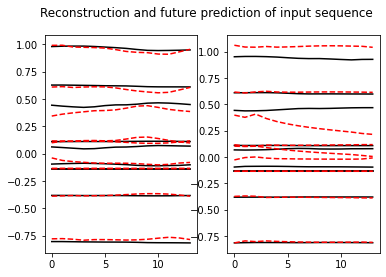

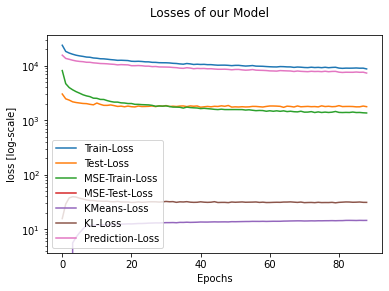

In [12]:
# Evaluate the network

vame.evaluate_model(config, model_name='VAME_prey_model')

In [13]:
# Segment behavior

vame.behavior_segmentation(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=[30])

Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti
Computing latent space for 09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo 
Computing latent space for 09_08_2020_15_54_36_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_50_32_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_47_44_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_43_03_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_39_45_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_36_13_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_08_2020_15_32_30_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_26_21_miniscope_DG_200701_a_succ 
Computing latent space for 09_08_2020_15_23_32_miniscope_DG_200701_a_succ 
Computing latent space for 09_08_2020_15_20_34_miniscope_DG_200701_a_succ 
Computing latent space for 09_08_2020_15_16_25_miniscope_DG_200701_a_succ 
Computing latent sp

Computing latent space for 09_02_2020_16_50_16_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_45_55_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_41_25_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_37_35_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_34_36_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_30_27_miniscope_DG_200701_a_succ_injured 
Computing latent space for 09_01_2020_16_58_35_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_01_2020_16_55_25_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_01_2020_16_47_10_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_43_46_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_39_52_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_01_2020_16_34_42_miniscope_DG_200617_b

Computing latent space for 08_19_2020_16_33_11_miniscope_DG_200617_b_succ_injured 
Computing latent space for 08_19_2020_16_27_02_miniscope_DG_200617_b_succ 
Computing latent space for 08_19_2020_16_16_55_miniscope_DG_200701_a_succ_noncon 
Computing latent space for 08_19_2020_16_11_32_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_19_2020_16_09_08_miniscope_DG_200701_a_succ 
Computing latent space for 08_19_2020_16_05_59_miniscope_DG_200701_a_succ_grabbedcable 
Computing latent space for 08_19_2020_16_01_41_miniscope_DG_200701_a_succ 
Computing latent space for 08_19_2020_15_58_22_miniscope_DG_200701_a_succ 
Computing latent space for 08_19_2020_15_55_28_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_19_2020_15_51_39_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_18_2020_16_45_57_miniscope_DG_200617_b_succ 
Computing latent space for 08_18_2020_16_41_33_miniscope_DG_200617_b_succ 
Computing latent space for 08_18_2020_16_38_40_m

Computing latent space for 08_12_2020_16_30_56_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_24_56_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_21_45_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_17_05_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_14_41_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_12_08_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_06_17_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_02_32_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_15_56_49_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_51_54_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_47_44_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon 
Computing latent space for 08_12_2020_15_39_17_miniscope_DG_200701_a_succ 
Computing latent s

Computing latent space for 08_06_2020_17_54_57_miniscope_DG_200701_a_succ 
Computing latent space for 08_06_2020_17_47_03_miniscope_DG_200701_a_fail 
Computing latent space for 08_06_2020_17_41_32_miniscope_DG_200701_a_succ 
Computing latent space for 08_06_2020_17_37_15_miniscope_DG_200701_a_succ 
Computing latent space for 08_06_2020_17_33_37_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_16_20_09_miniscope_DG_200617_b_succ 
Computing latent space for 08_05_2020_16_11_00_miniscope_DG_200617_b_succ 
Computing latent space for 08_05_2020_16_06_18_miniscope_DG_200617_b_succ_earlystop 
Computing latent space for 08_05_2020_15_55_12_miniscope_DG_200617_b_succ 
Computing latent space for 08_05_2020_15_43_21_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_15_36_29_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_15_29_56_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_15_22_44_miniscope_DG_200701_a_succ 
Computing laten

Computing latent space for 12_16_2019_16_27_17_miniscope_MM_191108_a_succ 
Computing latent space for 12_16_2019_16_21_34_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_32_29_miniscope_MM_191108_a_succ 
Computing latent space for 12_12_2019_15_27_48_miniscope_MM_191108_a_succ 
Computing latent space for 12_12_2019_15_23_10_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_18_57_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_16_04_miniscope_MM_191108_a_succ 
Computing latent space for 12_12_2019_15_11_45_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_08_15_miniscope_MM_191108_a_succ 
Computing latent space for 12_12_2019_15_04_45_miniscope_MM_191108_a_succ 
Computing latent space for 12_12_2019_15_00_56_miniscope_MM_191108_a_succ 
Computing latent space for 12_12_2019_14_58_00_miniscope_MM_191108_a_succ_nofluo 
Computing latent space for 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsa

Computing latent space for 12_03_2019_16_03_45_miniscope_MM_191107_a_succ_nomini 
Computing latent space for 12_03_2019_15_57_28_miniscope_MM_191107_a_succ_nomini 
Computing latent space for 12_03_2019_15_52_44_miniscope_MM_191107_a_succ_nomini 
Computing latent space for 12_03_2019_15_47_19_miniscope_MM_191107_a_succ_nomini 
Computing latent space for 12_03_2019_15_38_58_miniscope_MM_191106_a_fail_nomini 
Computing latent space for 12_03_2019_15_31_21_miniscope_MM_191106_a_fail_nomini 
Computing latent space for 12_03_2019_15_24_04_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_03_2019_15_15_55_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_03_2019_15_08_15_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_03_2019_15_00_53_miniscope_MM_191105_a_fail_nomini 
Computing latent space for 12_02_2019_17_52_21_miniscope_MM_191108_a_fail_nomini 
Computing latent space for 12_02_2019_17_44_49_miniscope_MM_191108_a_fail_nomini 
Computing latent

Computing latent space for 11_11_2019_01_21_58_miniscope_DG_190806_a_fail_nofluo 
Computing latent space for 11_11_2019_00_54_37_miniscope_DG_190806_a_fail_nomini 
Computing latent space for 11_11_2019_00_49_07_miniscope_DG_190806_a_fail_nomini 
Computing latent space for 11_11_2019_00_41_27_miniscope_DG_190806_a_fail_nomini 
Behavior segmentation via k-Means for 30 cluster.
Segmentation for file 09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo...
Segmentation for file 09_08_2020_15_54_36_miniscope_DG_200617_b_succ...
Segmentation for file 09_08_2020_15_50_32_miniscope_DG_200617_b_succ...
Segmentation for file 09_08_2020_15_47_44_miniscope_DG_200617_b_succ...
Segmentation for file 09_08_2020_15_43_03_miniscope_DG_200617_b_succ...
Segmentation for file 09_08_2020_15_39_45_miniscope_DG_200617_b_succ...
Segmentation for file 09_08_2020_15_36_13_miniscope_DG_200617_b_succ_injured...
Segmentation for file 09_08_2020_15_32_30_miniscope_DG_200617_b_succ...
Segmentation for file 0

Segmentation for file 08_30_2020_16_31_45_miniscope_DG_200617_b_succ...
Segmentation for file 08_30_2020_16_28_07_miniscope_DG_200617_b_succ...
Segmentation for file 08_30_2020_16_24_08_miniscope_DG_200617_b_succ...
Segmentation for file 08_30_2020_16_20_40_miniscope_DG_200617_b_succ...
Segmentation for file 08_30_2020_16_17_16_miniscope_DG_200617_b_succ...
Segmentation for file 08_30_2020_16_14_23_miniscope_DG_200617_b_succ...
Segmentation for file 08_30_2020_16_10_58_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_30_2020_16_03_21_miniscope_DG_200701_a_succ...
Segmentation for file 08_30_2020_15_59_37_miniscope_DG_200701_a_succ_injured...
Segmentation for file 08_30_2020_15_56_29_miniscope_DG_200701_a_succ...
Segmentation for file 08_30_2020_15_53_35_miniscope_DG_200701_a_succ_injured...
Segmentation for file 08_30_2020_15_50_51_miniscope_DG_200701_a_succ...
Segmentation for file 08_30_2020_15_47_33_miniscope_DG_200701_a_succ_injured...
Segmentation for file 08_30_2020

Segmentation for file 08_15_2020_16_31_30_miniscope_DG_200617_b_succ_nofluo...
Segmentation for file 08_15_2020_16_28_36_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_15_2020_16_25_08_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_15_2020_16_22_29_miniscope_DG_200617_b_succ...
Segmentation for file 08_15_2020_16_18_50_miniscope_DG_200617_b_succ...
Segmentation for file 08_15_2020_16_16_11_miniscope_DG_200617_b_succ...
Segmentation for file 08_15_2020_16_12_31_miniscope_DG_200617_b_succ...
Segmentation for file 08_15_2020_16_05_59_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_16_02_16_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_58_47_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_54_28_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_52_25_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_49_06_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_45_13

Segmentation for file 08_06_2020_18_50_24_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_46_29_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_42_09_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_35_22_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_30_31_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_24_41_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_15_22_miniscope_DG_200617_b_succ...
Segmentation for file 08_06_2020_18_07_32_miniscope_DG_200701_a_succ...
Segmentation for file 08_06_2020_18_02_17_miniscope_DG_200701_a_succ...
Segmentation for file 08_06_2020_17_58_44_miniscope_DG_200701_a_succ...
Segmentation for file 08_06_2020_17_54_57_miniscope_DG_200701_a_succ...
Segmentation for file 08_06_2020_17_47_03_miniscope_DG_200701_a_fail...
Segmentation for file 08_06_2020_17_41_32_miniscope_DG_200701_a_succ...
Segmentation for file 08_06_2020_17_37_15_miniscope_DG_200701_a_

Segmentation for file 12_12_2019_15_08_15_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_04_45_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_00_56_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_14_58_00_miniscope_MM_191108_a_succ_nofluo...
Segmentation for file 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai...
Segmentation for file 12_11_2019_17_09_52_miniscope_MM_191108_a_succ...
Segmentation for file 12_11_2019_17_05_25_miniscope_MM_191108_a_succ...
Segmentation for file 12_11_2019_17_01_21_miniscope_MM_191108_a_succ...
Segmentation for file 12_11_2019_16_56_38_miniscope_MM_191108_a_succ...
Segmentation for file 12_11_2019_16_53_36_miniscope_MM_191108_a_succ...
Segmentation for file 12_11_2019_16_49_04_miniscope_MM_191108_a_succ_miniscopeafterbonsai...
Segmentation for file 12_11_2019_16_45_12_miniscope_MM_191108_a_succ...
Segmentation for file 12_10_2019_16_57_26_miniscope_MM_191107_a_succ_nomini...
Segmenta

Segmentation for file 11_26_2019_16_54_02_miniscope_MM_191108_a_fail_nomini...
Segmentation for file 11_26_2019_16_48_28_miniscope_MM_191108_a_fail_nomini...
Segmentation for file 11_26_2019_16_39_57_miniscope_MM_191107_a_fail_nomini...
Segmentation for file 11_26_2019_16_32_30_miniscope_MM_191107_a_fail_nomini...
Segmentation for file 11_26_2019_16_26_36_miniscope_MM_191107_a_fail_nomini...
Segmentation for file 11_26_2019_16_20_21_miniscope_MM_191107_a_fail_nomini...
Segmentation for file 11_26_2019_16_10_04_miniscope_MM_191106_a_fail_nomini...
Segmentation for file 11_26_2019_15_59_23_miniscope_MM_191106_a_fail_nomini...
Segmentation for file 11_26_2019_15_52_26_miniscope_MM_191106_a_fail_nomini...
Segmentation for file 11_26_2019_15_44_01_miniscope_MM_191106_a_fail_nomini...
Segmentation for file 11_25_2019_16_36_00_miniscope_MM_191108_a_fail_nomini...
Segmentation for file 11_25_2019_16_28_56_miniscope_MM_191108_a_fail_nomini...
Segmentation for file 11_25_2019_16_22_23_miniscope_

In [14]:
# Quantify behavior

vame.behavior_quantification(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=30)

C:\Users\setup\.conda\envs\vame\lib\site-packages\vame-0.1-py3.7.egg\vame\analysis\behavior_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
